In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '../../../')
from helpers.ipython_helpers import (
    print_full
)
from helpers.rating_model_helpers import (
    RatingModelTrainer
)
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import (
    f1_score,
    fbeta_score,
    recall_score,
    precision_score,
    roc_curve,
    roc_auc_score,
    classification_report,
    confusion_matrix
)
import itertools
matplotlib.style.use('ggplot')
%matplotlib inline

ImportError: No module named helpers.ipython_helpers

In [2]:
def get_base_predictions(df):
    default_prediction = int(df['next_ranking'].mode()[0])
    base_predictions = []
    prev_gvkey = None
    
    for index, row in df.iterrows():
        gvkey = row['GVKEY']
        if prev_gvkey == gvkey:
            base_predictions.append(row['ranking'])
        else:
            base_predictions.append(default_prediction)
            prev_gvkey = gvkey 

    return base_predictions
      

In [3]:
original_features_df = pd.read_csv("../../../../data/credit_rating/intermediate_data/annual_credit_rating_features.csv")

In [4]:
original_features_df.head()

,Unnamed: 0,GVKEY,datadate,company_name,year,month,CASHMTA_win,EXRET_AVG_win,MB_win,NIMTA_AVG_win,PRICE_win,RSIZE_win,SIGMA_win,TLMTA_win,issuer_rating,ranking,month_diff,next_rating,next_ranking
0,0,1004,1987-05-31,AAR CORP,1987,5,0.008611,0.034983,1.708065,0.026351,2.708050,-8.909914,0.070182,0.265162,BBB,9,0,BBB,9.0
1,12,1004,1988-05-31,AAR CORP,1988,5,0.008763,0.050985,2.023136,0.026141,2.708050,-8.429054,0.105764,0.266415,BBB,9,12,BBB,9.0
2,24,1004,1989-05-31,AAR CORP,1989,5,0.008032,0.004447,2.054581,0.024010,2.708050,-8.397004,0.077810,0.281037,BBB,9,24,BBB,9.0
3,36,1004,1990-05-31,AAR CORP,1990,5,0.011098,-0.022577,1.590414,0.021466,2.708050,-8.741986,0.110929,0.362615,BBB,9,36,BBB,9.0
4,48,1004,1991-05-31,AAR CORP,1991,5,0.012673,-0.021842,1.052213,0.021802,2.555287,-9.398914,0.132336,0.483778,BBB,9,48,BBB,9.0


In [5]:
del original_features_df["Unnamed: 0"]

In [6]:
trainer = RatingModelTrainer(original_features_df)

In [7]:
trainer.make_dev_and_test_df(threshold_year=2005)

In [8]:
print(trainer.dev_df.shape[0], trainer.test_df.shape[0])

(20228, 10685)


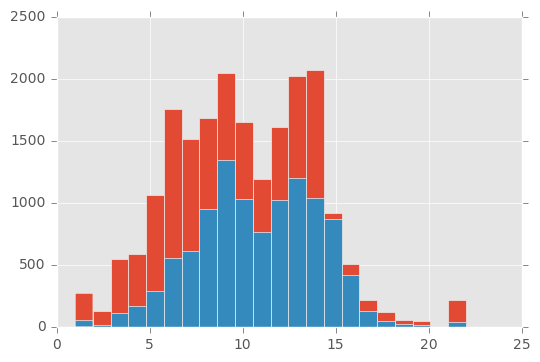

In [9]:
trainer.dev_df['next_ranking'].hist(range=(1, 22), bins=22)
trainer.test_df['next_ranking'].hist(range=(1, 22), bins=22)

In [10]:
test_df = trainer.test_df
y_test = trainer.y_test

In [11]:
base_predictions = get_base_predictions(test_df)

In [12]:
print("F1 Score - macro")
print(f1_score(y_test, base_predictions, average='macro'))
print("F1 Score - weighted")
print(f1_score(y_test, base_predictions, average='weighted'))
print("Detailed classification report:")
print(classification_report(y_test, base_predictions))

F1 Score - macro
0.57155099666
F1 Score - weighted
0.644378293059
Detailed classification report:
             precision    recall  f1-score   support

        1.0       0.85      0.82      0.84        50
        2.0       0.75      0.60      0.67        15
        3.0       0.84      0.77      0.80       108
        4.0       0.86      0.74      0.79       167
        5.0       0.85      0.76      0.80       288
        6.0       0.86      0.77      0.81       552
        7.0       0.81      0.71      0.75       610
        8.0       0.81      0.70      0.75       950
        9.0       0.39      0.84      0.53      1349
       10.0       0.79      0.68      0.73      1029
       11.0       0.74      0.62      0.67       766
       12.0       0.72      0.60      0.65      1022
       13.0       0.68      0.56      0.62      1199
       14.0       0.64      0.52      0.57      1037
       15.0       0.65      0.53      0.58       869
       16.0       0.56      0.43      0.49       422


In [36]:
y_test['next_ranking'].unique()

array([ 12.,  11.,  14.,  15.,  16.,  22.,  13.,  10.,   9.,   8.,   7.,
         3.,   5.,  17.,   6.,   2.,   1.,   4.,  18.,  20.,  19.])

Confusion matrix, without normalization


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,41,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,9,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2,83,4,0,0,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1,12,123,12,1,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,2,14,218,18,0,1,35,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,2,20,427,28,1,72,0,0,0,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,2,35,431,64,78,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,3,9,52,662,215,6,1,0,2,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,5,18,71,1127,114,8,4,0,2,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,4,15,219,700,79,12,0,0,0,0,0,0,0,0,0,0


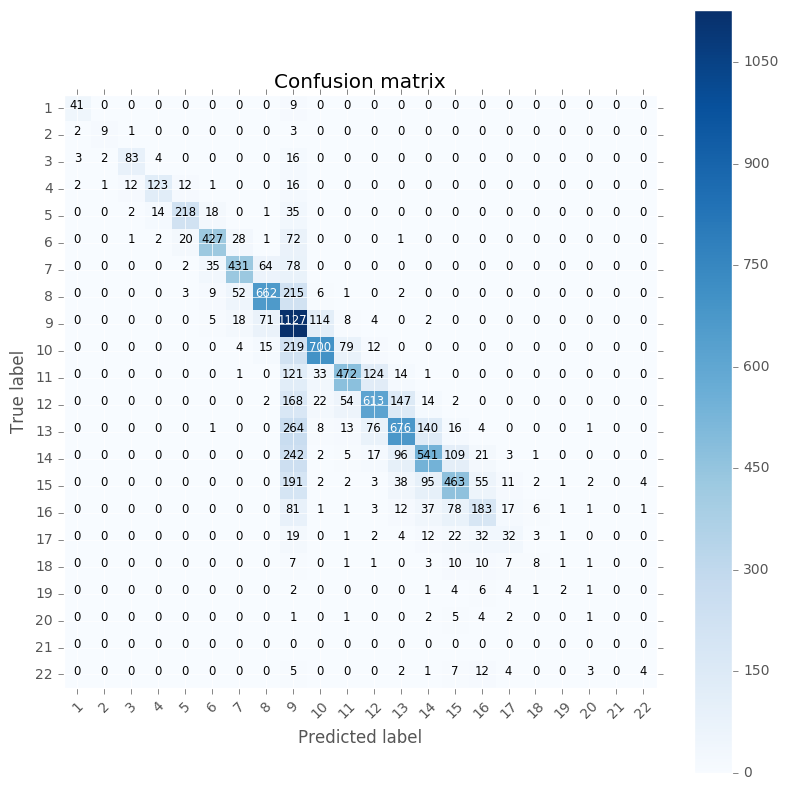

In [40]:
classes = [x for x in range(1, 23)]

cm = confusion_matrix(y_test, base_predictions, labels=classes)
cmap = plt.cm.Blues

plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

print('Confusion matrix, without normalization')
print_full(pd.DataFrame(cm))

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
         fontsize='small',
         horizontalalignment="center",
         color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()

In [ ]:
rating_change_df = test_df[test_df['ranking'] != test_df['next_ranking']]

In [ ]:
y_test_rating_change = rating_change_df['next_ranking']

In [ ]:
rating_change_predictions = make_base_predictions(rating_change_df)

In [ ]:
print("F1 Score - macro")
print(f1_score(y_test_rating_change, rating_change_predictions, average='macro'))
print("F1 Score - weighted")
print(f1_score(y_test_rating_change, rating_change_predictions, average='weighted'))
print("Detailed classification report:")
print(classification_report(y_test_rating_change, rating_change_predictions))